In [4]:
import os
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt

from IPython import display

In [5]:
video_path = "/home/changmin/data/UBFC-rPPG/DATASET_2/subject43/vid.avi"
cap = cv2.VideoCapture(video_path)

In [6]:
if not cap.isOpened():
    print("⚠️ Error: Video file could not be opened. Check the path or file format.")

In [7]:
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
fps = cap.get(cv2.CAP_PROP_FPS)

print(f"Width: {width}, Height: {height}, FPS: {fps}")
cap.release()

Width: 640.0, Height: 480.0, FPS: 29.342154


In [8]:
folder_path = "/home/changmin/data/UBFC-rPPG/PreprocessedData/UBFC-rPPG_SizeW128_SizeH128_ClipLength128_DataTypeDiffNormalized_DataAugNone_LabelTypeDiffNormalized_Crop_faceTrue_BackendHC_Large_boxTrue_Large_size1.5_Dyamic_DetFalse_det_len30_Median_face_boxFalse"
file_list = [f for f in os.listdir(folder_path) if "input" in f and f.endswith(".npy")]

In [6]:
def sort_key(filename):
    m = re.search(r'subject(\d+)_input(\d+)', filename)
    if m:
        subject = int(m.group(1))
        frame = int(m.group(2))
        return (subject, frame)
    return (0, 0)

In [ ]:
file_list = sorted(file_list, key=sort_key)

KeyboardInterrupt: 

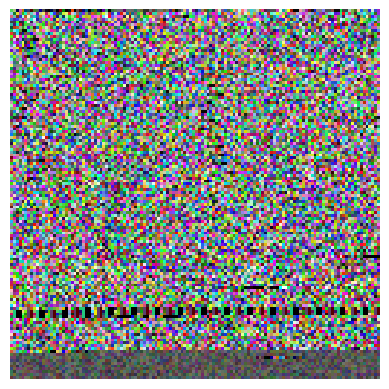

In [10]:
for file in file_list:
    frame = np.load(os.path.join(folder_path, file))
    # 만약 그레이스케일이면 colormap 적용
    if len(frame.shape) == 2:
        plt.imshow(frame, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(frame.astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)


In [ ]:
first_frame = np.load(os.path.join(folder_path, file_list[0]))
height, width = first_frame.shape[:2]
print("Width:", width, "Height:", height)

Width: 128 Height: 128


In [ ]:
'''cap2 = cv2.VideoCapture('/home/changmin/ReMOTION/output_video.mp4')

# 비디오 파일이 정상적으로 열렸는지 확인
if not cap2.isOpened():
    print("비디오 파일을 열 수 없습니다.")
    exit()

while True:
    ret2, frame2 = cap2.read()
    # 더 이상 읽을 프레임이 없으면 종료
    if not ret2:
        break
    # 프레임을 화면에 표시
    cv2.imshow("Video Playback", frame2)
    # 'q' 키를 누르면 종료 (약 30ms 딜레이, 필요에 따라 조정)
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# 자원 해제
cap2.release()
cv2.destroyAllWindows()'''

비디오 파일을 열 수 없습니다.


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x55a3971257c0] moov atom not found


: 